In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline

from glob import glob

In [3]:
female = glob('../data/crop/female_crop/*.png')
male = glob('../data/crop/male_crop/*.png')

In [6]:
path = female + male

In [15]:
# getting size of image
def getSize(path):    
    img = Image.open(path)
    return img.size[0]

In [16]:
# Create DataFrame
df = pd.DataFrame(data=path,columns=['path'])
df.head() # display top 5 rows

,path
0,../data/crop/female_crop\female_0.png
1,../data/crop/female_crop\female_1.png
2,../data/crop/female_crop\female_100.png
3,../data/crop/female_crop\female_1003.png
4,../data/crop/female_crop\female_1008.png


In [17]:
df['size'] = df['path'].apply(getSize)
df.head()

,path,size
0,../data/crop/female_crop\female_0.png,273
1,../data/crop/female_crop\female_1.png,182
2,../data/crop/female_crop\female_100.png,182
3,../data/crop/female_crop\female_1003.png,182
4,../data/crop/female_crop\female_1008.png,81


In [18]:
df.tail()

,path,size
6053,../data/crop/male_crop\male_989.png,182
6054,../data/crop/male_crop\male_99.png,273
6055,../data/crop/male_crop\male_991.png,122
6056,../data/crop/male_crop\male_995.png,182
6057,../data/crop/male_crop\male_999.png,273


In [20]:
#EDA

In [21]:
df.describe()

,size
count,6058.000000
mean,153.998349
std,71.193405
min,24.000000
25%,81.000000
50%,122.000000
75%,182.000000
max,410.000000


<AxesSubplot:>

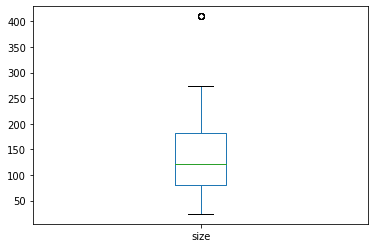

In [24]:
df['size'].plot(kind ='box')

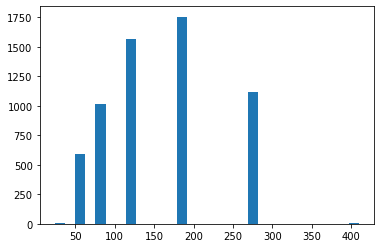

In [28]:
plt.hist(df['size'],bins=30)
plt.show()

In [29]:
### So, from analysis I will resize al the image in 100x100 form and remove image with size less or equal 54

In [30]:
df_new = df[df ['size'] > 60]

In [31]:
df_new

,path,size
0,../data/crop/female_crop\female_0.png,273
1,../data/crop/female_crop\female_1.png,182
2,../data/crop/female_crop\female_100.png,182
3,../data/crop/female_crop\female_1003.png,182
4,../data/crop/female_crop\female_1008.png,81
...,...,...
6053,../data/crop/male_crop\male_989.png,182
6054,../data/crop/male_crop\male_99.png,273
6055,../data/crop/male_crop\male_991.png,122
6056,../data/crop/male_crop\male_995.png,182


In [36]:
string  = df_new['path'][0]
def gender(string):
    try:
        
        return string.split('_')[0].split('/')[-1]
    except:
        return None

In [38]:
df['gender']= df['path'].apply(gender)

female    0.592605
male      0.407395
Name: gender, dtype: float64


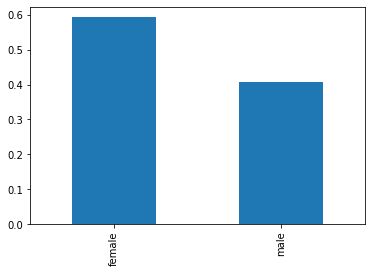

In [45]:
print(df['gender'].value_counts(normalize=True))
df['gender'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [46]:
# 1. 60% Female are there and rest 40% are male
# 2. All the images size is greater than or equal to 81
# 
# conclusion: resizing all the image in df_new to 100 x 100 array

In [47]:
## Resize Image

In [56]:
def resize_img(path_to_resize):
    try:
        
        # step -1: read image
        img = cv2.imread(path_to_resize)
        # step -2: convert into grayscale
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # step -3: resize into 100 x 100 array
        size = gray.shape[0]
        if size >= 100:  # SHRINK
            gray_re = cv2.resize(gray,(100,100),cv2.INTER_AREA)
        else: # ENLARGE
            gray_re = cv2.resize(gray,(100,100),cv2.INTER_CUBIC) 
        # step -4: Flatten Image (1x10,000)
        return gray_re.flatten()
    except:
        return None

In [57]:
len(resize_img(path[0]))

10000

In [58]:
df_new['gender'] = df_new['path'].apply(gender)
df_new.head()

<ipython-input-58-38f68fd0a050>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['gender'] = df_new['path'].apply(gender)


,path,size,gender,structured_data
0,../data/crop/female_crop\female_0.png,273,female,"[188, 180, 184, 188, 173, 179, 192, 178, 216, ..."
1,../data/crop/female_crop\female_1.png,182,female,"[32, 24, 32, 27, 29, 29, 29, 32, 36, 30, 46, 8..."
2,../data/crop/female_crop\female_100.png,182,female,"[22, 30, 39, 36, 30, 61, 11, 17, 10, 19, 13, 1..."
3,../data/crop/female_crop\female_1003.png,182,female,"[35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 3..."
4,../data/crop/female_crop\female_1008.png,81,female,"[86, 86, 71, 54, 45, 49, 33, 20, 18, 23, 27, 2..."


In [61]:
df_new['structure_data'] = df_new['path'].apply(resize_img)

<ipython-input-61-a7cdefd874db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['structure_data'] = df_new['path'].apply(resize_img)


In [62]:
# copy and expand their columns
df1 = df_new['structure_data'].apply(pd.Series)
df1

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,188,180,184,188,173,179,192,178,216,219,...,109,111,115,116,122,116,119,120,117,111
1,32,24,32,27,29,29,29,32,36,30,...,58,47,27,33,22,28,22,36,62,17
2,22,30,39,36,30,61,11,17,10,19,...,156,171,177,186,176,185,186,190,177,177
3,35,35,35,35,35,35,35,35,35,35,...,75,82,90,92,86,70,89,84,84,74
4,86,86,71,54,45,49,33,20,18,23,...,35,34,32,32,30,32,34,34,33,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6053,31,31,31,31,31,31,31,31,30,29,...,72,72,39,21,39,32,28,49,87,28
6054,88,41,33,18,15,14,13,29,25,74,...,47,49,117,12,114,87,17,131,21,106
6055,25,25,26,25,26,31,35,46,60,114,...,45,46,44,41,37,34,31,30,31,34
6056,21,27,31,24,19,24,21,19,31,36,...,22,14,11,16,16,19,23,20,22,25


In [63]:
df2 = pd.concat((df_new['gender'],df1),axis=1)

In [64]:
df2.head()

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,female,188,180,184,188,173,179,192,178,216,...,109,111,115,116,122,116,119,120,117,111
1,female,32,24,32,27,29,29,29,32,36,...,58,47,27,33,22,28,22,36,62,17
2,female,22,30,39,36,30,61,11,17,10,...,156,171,177,186,176,185,186,190,177,177
3,female,35,35,35,35,35,35,35,35,35,...,75,82,90,92,86,70,89,84,84,74
4,female,86,86,71,54,45,49,33,20,18,...,35,34,32,32,30,32,34,34,33,30


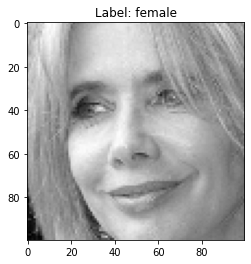

In [69]:
plt.imshow(df2.loc[0][1:].values.reshape(100,100).astype('int'),cmap='gray')
plt.title("Label: "+df2.loc[0]['gender'])
plt.show()

In [70]:
import pickle

In [71]:
pickle.dump(df2,open('../data/dataframe_images_100_100.pickle','wb'))